In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
def convert_k(valor):
    "remove k in money columns"
    if 'k' in valor:
        return int(float(valor.replace('k', '')) * 1000)

In [17]:
df_economy = pd.read_csv(filepath_or_buffer="csv/vct_2025_americas_stage_1/team_economy_vct_2025_americas_stage_1.csv")

In [18]:
df_economy2 = pd.read_csv(filepath_or_buffer="csv/valorant_masters_toronto_2025/team_economy_valorant_masters_toronto_2025.csv")
df_economy3 = pd.read_csv(filepath_or_buffer="csv/vct_2025_emea_stage_1/team_economy_vct_2025_emea_stage_1.csv")
df_economy4 = pd.read_csv(filepath_or_buffer="csv/vct_2025_pacific_stage_1/team_economy_vct_2025_pacific_stage_1.csv")

In [19]:
df_concat = pd.concat([df_economy,df_economy2])
df_concat = pd.concat([df_concat,df_economy3])
df_concat = pd.concat([df_concat,df_economy4])

In [21]:
columns_update = ["team_a_economy","team_b_economy","team_a_bank","team_b_bank"]

for column_name in columns_update:
    df_concat[column_name] = df_concat[column_name].apply(convert_k)

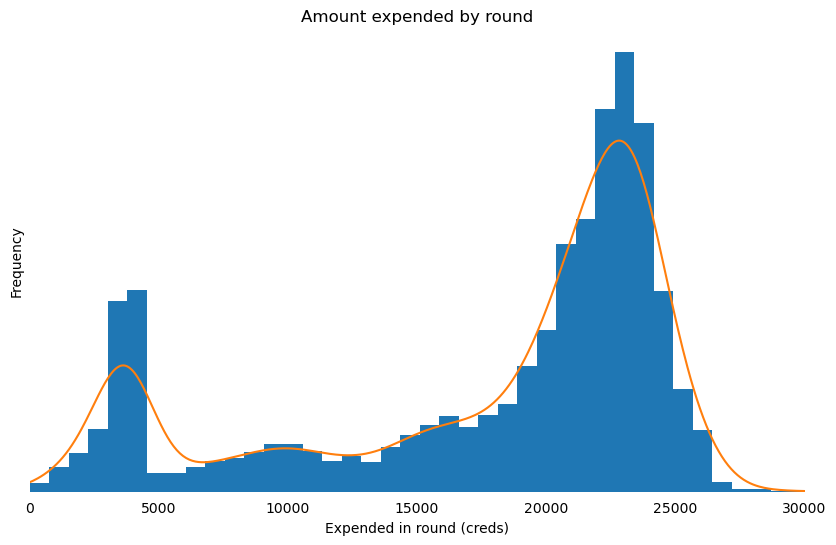

In [35]:
nbins = 40

dist1 = df_concat["team_a_economy"]
dist2 = df_concat["team_a_bank"]

fig, ax = plt.subplots(figsize=(10,6))

dist1.plot(kind="hist",density=True,bins=nbins)
dist1.plot(kind = "kde")

# X #
ax.set_xlabel("Expended in round (creds)")
ax.set_xlim(0, 30000)

ax.set_yticks([])
ax.set_ylabel("Frequency")

# Overall #
ax.set_title("Amount expended by round")
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

In [46]:
df_concat[["team_a_economy","round"]]

,team_a_economy,round
0,3700,1
1,16900,2
2,17100,3
3,16200,4
4,21000,5
...,...,...
4457,16900,20
4458,19900,21
4459,21400,22
4460,11600,23


In [64]:
X = df_concat[["team_a_economy","round"]].copy()

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
clusters = db.fit_predict(X_scaled)  # o X_pca si querés usar la reducción



In [70]:
df_concat["clusters"] = clusters

In [79]:
df_concat

,team_a,team_b,team_a_economy,team_b_economy,round,team_a_bank,team_b_bank,map,date,event,clusters
0,NRG,C9,3700,4100,1,100,100,Lotus,2025-03-21 17:00:00,VCT 2025: Americas Stage 1,0
1,NRG,C9,16900,2500,2,7900,1900,Lotus,2025-03-21 17:00:00,VCT 2025: Americas Stage 1,0
2,NRG,C9,17100,23200,3,1100,8500,Lotus,2025-03-21 17:00:00,VCT 2025: Americas Stage 1,0
3,NRG,C9,16200,24000,4,7700,2800,Lotus,2025-03-21 17:00:00,VCT 2025: Americas Stage 1,0
4,NRG,C9,21000,11500,5,8400,11300,Lotus,2025-03-21 17:00:00,VCT 2025: Americas Stage 1,0
...,...,...,...,...,...,...,...,...,...,...,...
4457,GEN,RRQ,16900,22800,20,11500,8600,Icebox,2025-05-11 04:00:00,VCT 2025: Pacific Stage 1,0
4458,GEN,RRQ,19900,24900,21,19200,3500,Icebox,2025-05-11 04:00:00,VCT 2025: Pacific Stage 1,0
4459,GEN,RRQ,21400,24100,22,5600,6200,Icebox,2025-05-11 04:00:00,VCT 2025: Pacific Stage 1,0
4460,GEN,RRQ,11600,24400,23,11700,6500,Icebox,2025-05-11 04:00:00,VCT 2025: Pacific Stage 1,0


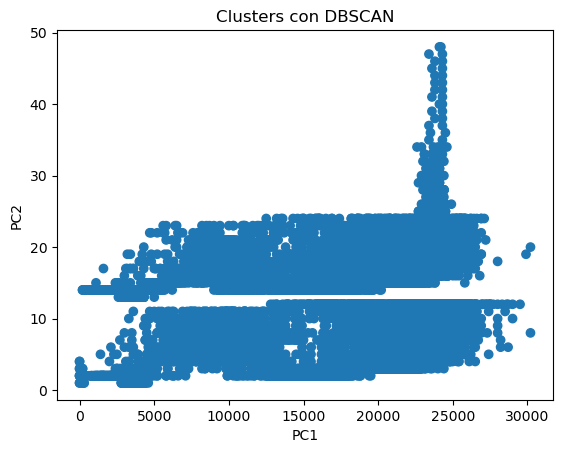

In [80]:
plt.scatter(X["team_a_economy"], X["round"], c=df_concat["clusters"], cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters con DBSCAN")
plt.show()